#MLP - Norman Vicente

## Clasificacion de generos musicales desde 1956

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import cross_val_score
import keras.backend as K
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
dataset = pd.read_csv('data.csv') 
dataset.head(50)

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
5,6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45
6,7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74
7,8,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69
8,9,Mr. Brightside,The Killers,modern rock,2004,148,92,36,-4,10,23,223,0,8,77
9,10,Without Me,Eminem,detroit hip hop,2002,112,67,91,-3,24,66,290,0,7,82


## Analisis exploratorio

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [10]:
dataset.replace(',','', regex=True, inplace=True)
dataset['Length (Duration)']= dataset['Length (Duration)'].apply(pd.to_numeric,errors='coerce')

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Top Genre               1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   int64 
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

In [12]:
dataset.drop(columns = ['Index'], inplace = True)
dataset.columns = map(str.lower, dataset.columns)

### Renombrando las columnas

In [14]:
dataset.rename(columns = {'top genre' : 'genre', 'beats per minute (bpm)':'beats_per_minute','loudness (db)': 'loudness','length (duration)': 'duration'}, inplace = True)
dataset

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,Heartbreak Hotel,Elvis Presley,adult standards,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,adult standards,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,blues rock,1959,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,bebop,1959,174,26,45,-13,7,60,324,54,4,65


In [15]:
dataset.tail(50)

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
1944,Daydream Believer,The Monkees,brill building pop,1968,126,49,51,-10,11,65,180,26,3,69
1945,Back In The U.S.S.R. - Remastered 2009,The Beatles,british invasion,1968,142,97,48,-7,6,49,163,7,9,66
1946,Girl You'll Be A Woman Soon,Neil Diamond,adult standards,1968,110,64,52,-6,32,66,180,57,3,59
1947,Here Comes The Sun - Remastered 2009,The Beatles,british invasion,1969,129,54,56,-10,18,39,186,3,3,82
1948,Space Oddity - 2015 Remaster,David Bowie,album rock,1969,140,44,30,-13,18,43,319,7,3,73
1949,Gimme Shelter,The Rolling Stones,album rock,1969,119,63,63,-8,17,49,271,45,3,76
1950,Suspicious Minds,Elvis Presley,adult standards,1969,117,38,49,-11,41,71,261,4,3,72
1951,Whole Lotta Love - 1990 Remaster,Led Zeppelin,album rock,1969,90,90,41,-12,41,42,334,5,41,76
1952,Sweet Caroline,Neil Diamond,adult standards,1969,63,13,53,-16,24,58,204,61,3,78
1953,Fortunate Son,Creedence Clearwater Revival,album rock,1969,133,66,64,-8,15,66,141,20,4,80


## Juntamos los generos

In [16]:
def genre_splitter(genre):
    result = genre.copy()
    result = result.str.split(" ",1)
    for i in range(len(result)):
        if (len(result[i]) > 1):
            result[i] = [result[i][1]]
    return result.str.join('')

new_genre = dataset['genre'].copy()
while(max((new_genre.str.split(" ", 1)).str.len()) > 1):
    new_genre = genre_splitter(new_genre)
    

In [17]:
new_genre.value_counts()

rock           856
pop            333
standards      123
metal           93
indie           77
              ... 
cyberpunk        1
alternative      1
anthem-folk      1
laboratorio      1
streektaal       1
Name: genre, Length: 68, dtype: int64

In [18]:
dataset['genre'] = new_genre
dataset['genre']

0       standards
1            rock
2             hop
3           metal
4            rock
          ...    
1989    standards
1990    standards
1991         rock
1992        bebop
1993    standards
Name: genre, Length: 1994, dtype: object

## Nuevos generos de Musica

In [22]:
def top_10(column):
    top_10_songs = dataset.groupby([column]).sum().sort_values('popularity', ascending=False).head(10)
    return(top_10_songs[['popularity']])
    

pie_data =top_10('genre')

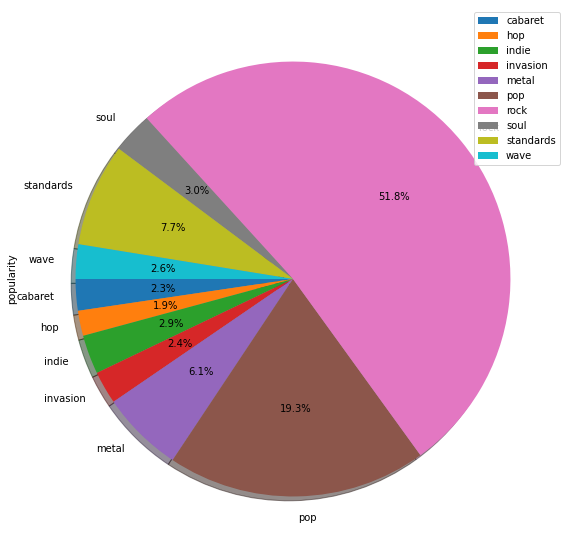

In [23]:
pie_data.groupby(['genre']).sum().plot(kind='pie', y='popularity' , shadow = True, startangle=180, figsize=(15,10), autopct='%1.1f%%')

In [52]:
dataset.tail()

,title,artist,genre,year,beats_per_minute,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
1989,Heartbreak Hotel,Elvis Presley,64,1958,94,21,70,-12,11,72,128,84,7,63
1990,Hound Dog,Elvis Presley,64,1958,175,76,36,-8,76,95,136,73,6,69
1991,Johnny B. Goode,Chuck Berry,57,1959,168,80,53,-9,31,97,162,74,7,74
1992,Take Five,The Dave Brubeck Quartet,9,1959,174,26,45,-13,7,60,324,54,4,65
1993,Blueberry Hill,Fats Domino,64,1959,133,50,49,-10,16,83,148,74,3,56


## Label Encoding

In [24]:
dataset['genre'] = pd.Categorical(dataset.genre)

In [26]:
dataset.dtypes

title                 object
artist                object
genre               category
year                   int64
beats_per_minute       int64
energy                 int64
danceability           int64
loudness               int64
liveness               int64
valence                int64
duration               int64
acousticness           int64
speechiness            int64
popularity             int64
dtype: object

In [25]:
label_cat = dataset["genre"].cat.codes
numer_cat = dataset["genre"]

In [27]:
numer_cat

0       standards
1            rock
2             hop
3           metal
4            rock
          ...    
1989    standards
1990    standards
1991         rock
1992        bebop
1993    standards
Name: genre, Length: 1994, dtype: category
Categories (68, object): ['afropop', 'alternative', 'ambient', 'americana', ..., 'standards',
                          'streektaal', 'trance', 'wave']

In [28]:
dataset["genre"] = dataset["genre"].cat.codes

In [29]:
y = dataset['genre']
X = dataset[['loudness', 'danceability', 'energy', 'valence']] 

##Train - Test - Val

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [31]:
x_train= x_train.values
y_train = y_train.values

In [ ]:
X_train = StandardScaler().fit_transform(X_train)

##Modelo I

In [37]:
def baseline_model():
  model = Sequential()
  model.add(Dense(30, input_shape = (4,), activation = "relu"))
  model.add(Dense(30, activation = "relu"))
  model.add(Dense(68, activation = "softmax"))
  model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
  model.summary()
  return model

## Modelo II

In [34]:
model = Sequential()
model.add(Dense(4, input_shape = (4,), activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(2, activation = "relu"))
model.add(Dense(68, activation = "softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_7 (Dense)              (None, 68)                204       
Total params: 247
Trainable params: 247
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(x_train, y_train, verbose=1, epochs=100, batch_size=32)

Epoch 1/100
50/50 [==============================] - 1s 1ms/step - loss: 8.1810 - accuracy: 0.1455
Epoch 2/100
50/50 [==============================] - 0s 1ms/step - loss: 4.4755 - accuracy: 0.4339
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 3.5488 - accuracy: 0.4339
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 3.3124 - accuracy: 0.4339
Epoch 5/100
50/50 [==============================] - 0s 1ms/step - loss: 3.1617 - accuracy: 0.4339
Epoch 6/100
50/50 [==============================] - 0s 1ms/step - loss: 3.0292 - accuracy: 0.4339
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 2.9136 - accuracy: 0.4339
Epoch 8/100
50/50 [==============================] - 0s 1ms/step - loss: 2.8164 - accuracy: 0.4339
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 2.7362 - accuracy: 0.4339
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 2.6703 - accuracy: 0.4339
Epoch 11/

## Cross Validation

In [38]:
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 1)

In [40]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 20)

In [42]:
results = cross_val_score(estimator, x_train, y_train, cv = kfold)
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 30)                150       
_________________________________________________________________
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_10 (Dense)             (None, 68)                2108      
Total params: 3,188
Trainable params: 3,188
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 4.3163 - accuracy: 0.3307
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 2.5300 - accuracy: 0.4224
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 2.3862 - accuracy: 0.4326
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 2.30

## Predicciones

In [44]:
preds = np.argmax(y_pred_class, axis=-1) 

In [51]:
preds

array([57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57

In [46]:
y_test[0:30]

906     57
450     57
1394    28
1683    30
1688    47
1949    57
292     57
803     57
391     67
257     62
993     57
898     57
675     57
1582    57
1172    56
1979    57
640     19
1555    57
1950    64
454     51
362     51
1156    57
1954    64
1542    57
163     12
1438    20
749     13
606     57
1002    57
371     17
Name: genre, dtype: int8

In [47]:
preds[0:30]

array([57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
       57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57])

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           6       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         8
          20       0.00      0.00      0.00         6
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         5
          28       0.00      0.00      0.00         4
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         6
          31       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Conclusiones

- La idea del proyecto nacio gracias a que spotify clasifica de una manera que no me gusta
- Despues de buscar encontre un dataset para trabajar un modelo de clasificacion multiclase
- Me encontre con varios retos, el mayor fue la data desbalanceada ya que mi etiquera a predecir (Genre) en este dataset contenia 146 clases.
- El problema escalaba demasiado al ser 146 clases(generos) 
- Logre comprimir los subgeneros en un genero principal y asi se logro reducir a 68 clases aun asi el dataset se encontraba desbalanceado como se puede ver en el grafico de pie
- Utilize otras metricas al ser un dataset desbalanceado como F1, recall y accuracy dando resultados de 94% de recall, F1 de 59% y accuracy de 43%
- Se uso un modelo de MLP de clasificacion multiclase usando 3 capas ocultas con funcion de activacion ReLu

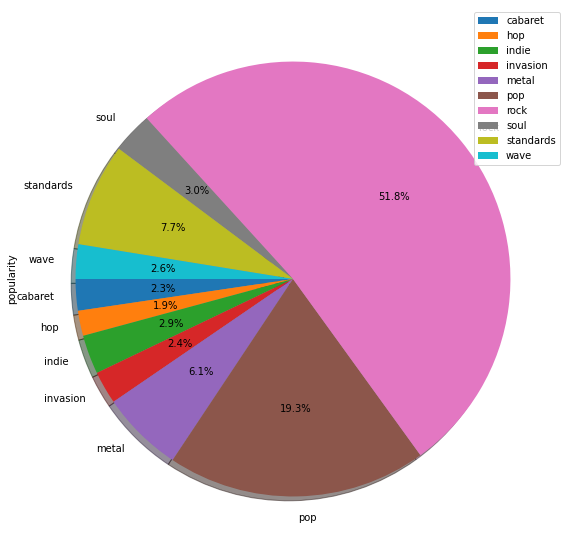

In [20]:
j.groupby(['genre']).sum().plot(kind='pie', y='popularity' , shadow = True, startangle=180, figsize=(15,10), autopct='%1.1f%%')